<a href="https://colab.research.google.com/github/AbhijeetAbhijeet/Image-Processing/blob/main/assignment1_ip_20d070003.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(780, 360, 3)


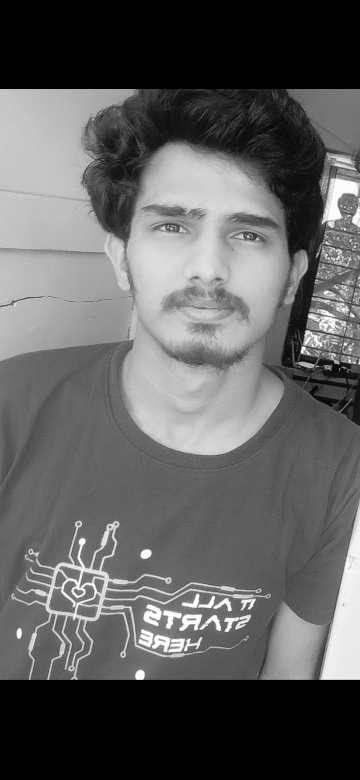

In [7]:
import cv2 as cv     #importing cv2 library as cv
import numpy as np   #importing numpy lirary as np
from matplotlib import pyplot as plt  #importing matplot's pyplot library as plt for drawing Histograms
from skimage import exposure
from skimage.exposure import match_histograms
from google.colab.patches import cv2_imshow
#** Question 1 **

#Reading the image from path and saving it in the form of a numy array of name 'img'.
img = cv.imread('/content/abhi.jpg')

#Default image size is height=2400 and width=1080 too long
#Resizing the image so that seen fully on the desktop. 
img = cv.resize(img,(360,780))

#Collecting the shape of image
print(img.shape)

#converting the image into gray image
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

#Displaying the image in a window named my_img
cv2_imshow(img)

In [24]:
#** Question 2 **
#Calculating the center of the image named as 'img' and stroing it in a tuple named 'center'
height , width = img.shape[:2]
center = (width/2,height/2)
print(center)    # center=(180.0,390.0)

#Intinsity of center pixel 
center_pixel_intinsity = img[180,290]   #194

#Pixels intinsity of a small setion Rectangle(10X10). Stroing in a 2D Array 
small_sec_intensity = np.array(img[215:225,270:280])
print(small_sec_intensity)

(220.0, 390.0)
[[191 187 187 187 180 168 158 156 156 153]
 [188 186 184 180 175 180 179 180 176 166]
 [187 183 180 176 170 166 154 152 153 149]
 [179 179 179 178 175 176 164 150 140 137]
 [180 178 175 170 163 161 157 151 140 124]
 [182 179 174 168 163 153 145 142 139 134]
 [175 174 174 173 166 152 152 147 143 144]
 [177 173 171 166 157 153 143 143 148 149]
 [179 172 168 165 159 155 155 156 153 148]
 [176 172 169 164 159 158 158 155 153 152]]


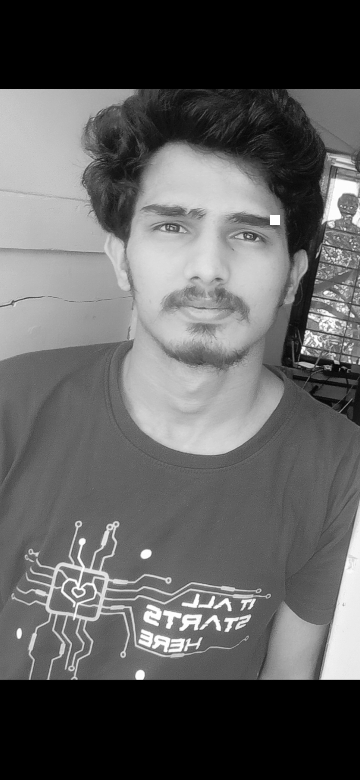

In [9]:
#** Question 3 **
# Selected region for the 2D Array converted int a region of intinsity = 255 each pixel. And Showing
# in a new WIndow named my_new_image.
new_img_255 = np.array(img)
new_img_255[215:225,270:280] = 255

#Displaying the image in a window named 'my_img_255'
cv2_imshow(new_img_255)
#In the new Image the small rectamngle is completely White. And constant intinsity.


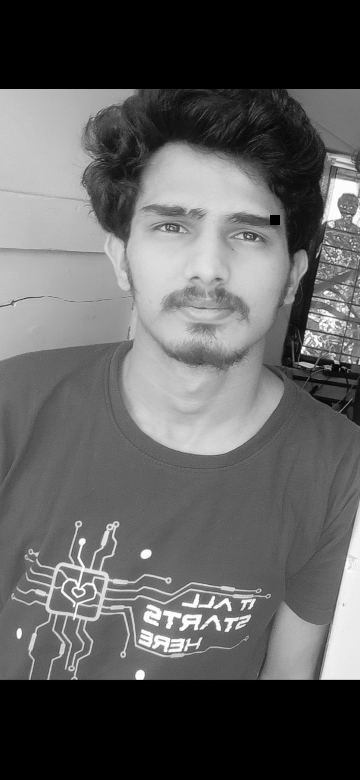

In [11]:
#** Question 4 **
# Selected region for the 2D Array converted into a region of intinsity = 255 each pixel. And Showing
# in a new WIndow named my_new_image.
new_img_256 = np.array(img)
new_img_256[215:225,270:280] = 256
#Displaying the image in a window named 'my_img_256'
cv2_imshow(new_img_256)
#In the new Image the small rectamngle is completely Black. And constant intinsity.


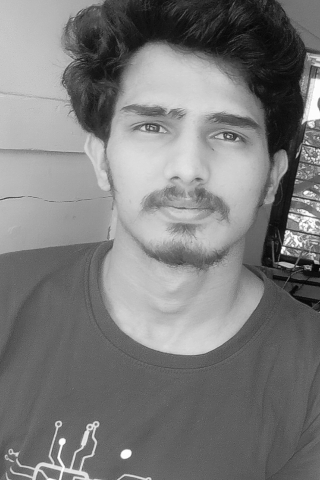

In [12]:
#** Question 5 **
#Here I used the slicing method of numpy arrays to crop the image.
#Crop Parameters Right = 20, Left = 20, Top = 100, Bottom = 200 
new_sliced_img = np.array(img[100:580,20:340])

#Displaying the image in a window named 'my_sliced_image'
cv2_imshow(new_sliced_img)

In [13]:
#** Question 6 **
#Saving the croped image in png format using inwrite instruction. 
cv.imwrite('/content/abhi.png', new_sliced_img)



True

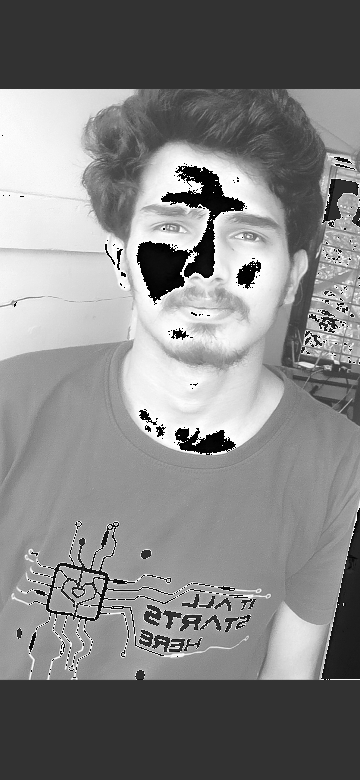

In [14]:
#** Question 7 **

#Increasing the intensity of each pixel by a multiplying factor
add_50_img = np.array(50+img)

#Displaying the image in a window named 'image_add_50'
cv2_imshow(add_50_img)

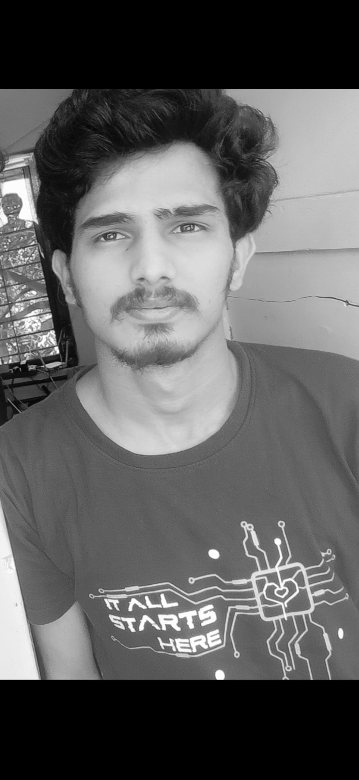

In [15]:
#** Question 8 **
#Inverting the Image along the Y axis in co-ordinate axis. IN image point of view it is accross x-axis.
mirror_img = np.array(img[:780,360:0:-1])

#Displaying the image in a window named 'mirror_image'
cv2_imshow(mirror_img)

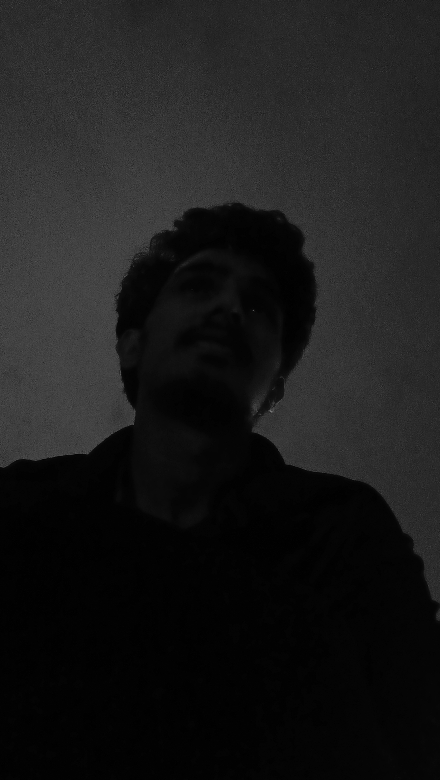

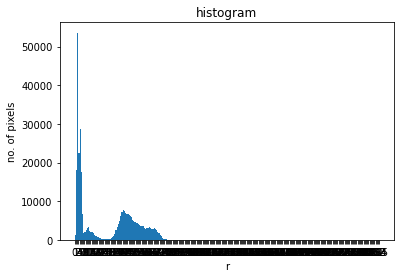

In [18]:
#** Question 9 **

#Reading the image from path and saving it in the form of a numy array of name 'night_img'.
night_img = cv.imread('/content/night.jpg')

#Image Height = 4608 and width =2592
#Need to resize so that fix on screen.
night_img = cv.resize(night_img,(440,780))

#Converting the image into Gray color
night_img = cv.cvtColor(night_img,cv.COLOR_BGR2GRAY)

#Displaying the image in a window named 'night_image'
cv2_imshow(night_img)

fig,ax = plt.subplots(1,1)    #Defining only one figure 1 row and column
r = np.arange(256)            #x-axis in 1d array showing the different intensity levels.

#Convertin the intesities into  a 1d array so that used for making Histogram Data
intensity_array=night_img.reshape(440*780)
ax.hist(intensity_array,bins = r)   #Defining Histogram With its X and Y-axis Data
ax.set_title("histogram") 
ax.set_xticks(r)
ax.set_xlabel('r')
ax.set_ylabel('no. of pixels')
#Showing the Histogram
plt.show()

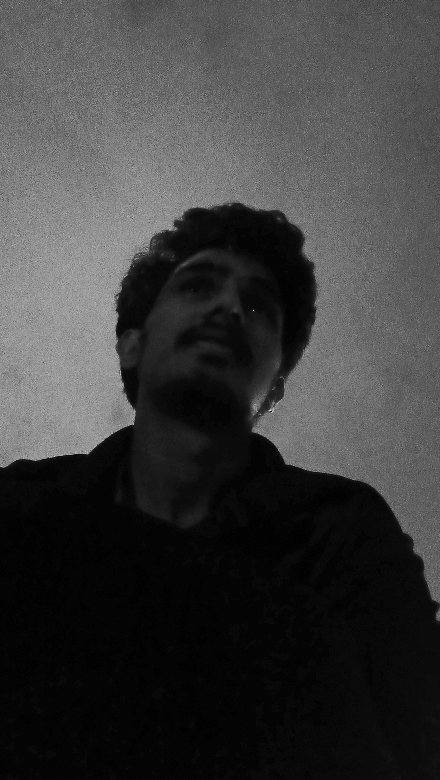

In [19]:
#** Question 10 **
#Data Type if Intensities is 'uint8'
multiplying_factor = 2.29
#A new enhanced image = multiplying each pixel with multiplying factor
new_night_img = np.array(night_img*multiplying_factor)   #type = uint8
#converting the intexsities values inyo integer because float are not read by uint8 type
new_night_img= np.int_(new_night_img)   #type = int32
#reconvertint the int into uint8 so that yse this array as image array
new_night_img = np.uint8(new_night_img)  #type = uint8

#Displaying the image in a window named 'nw_night_image'
cv2_imshow(new_night_img)

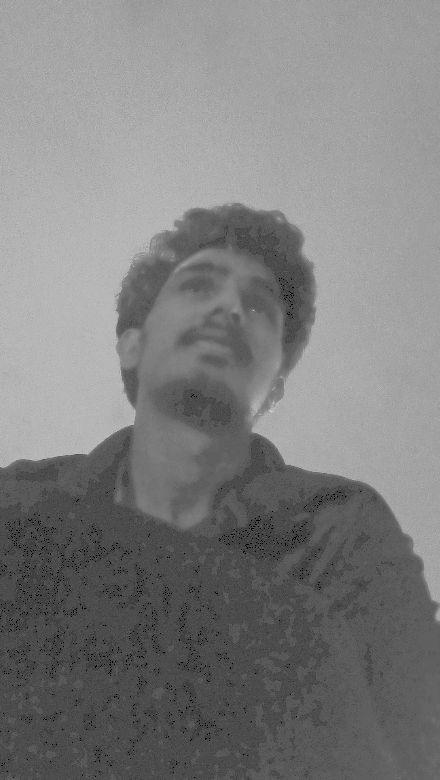

In [20]:
#** Question 11 **
gamma_factor = 1/4            #Best subjective gamma = 1.1766
#First converting the entesities if each pixel less than one 
gm_nt_img = night_img/255
#Now importing the gamma factor, I use less than one pixel because if it is not less than one the maximum 
#value of ,gamma factor is 1.176 to convert the maximun intensity into 255 intensity level.
#But if each intensity level is less than one we can any value of gamma factor
#which is greater than 1 satisfies levels are less than one.
gm_nt_img = np.array(gm_nt_img**gamma_factor)
#Again converting the intensities levels from 1 to 255
gm_nt_img = gm_nt_img*255
#Levels are not exactly integers , so need to convert them into integer
gm_nt_img = np.int_(gm_nt_img) #type int32
#Againt tyoe into uint8 , so use array as Image. 
gamma_night_img = np.uint8(gm_nt_img) #uint8

#Displaying the image in a window named 'gamma_night_image'
cv2_imshow(gamma_night_img)

255


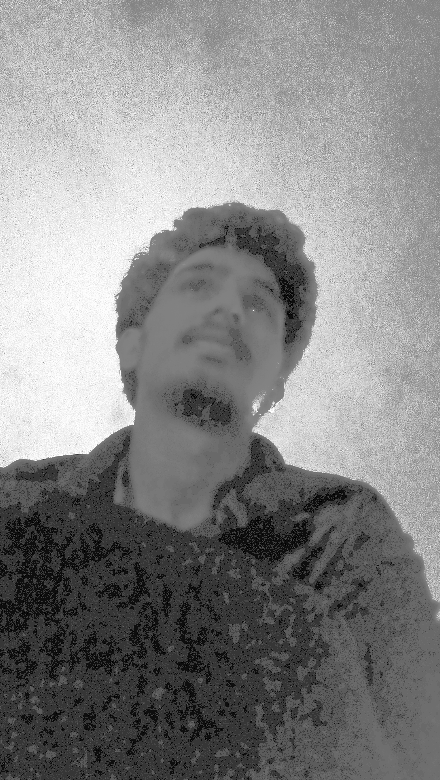

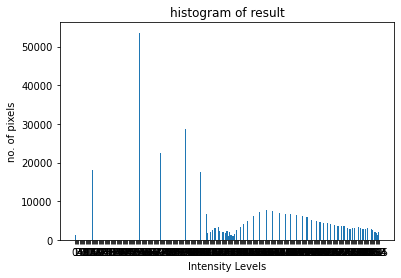

In [21]:
#** Question 12 **
fig1,ax1 = plt.subplots(1,1)    #Defining only one figure 1 row and column
r1 = np.arange(256)            #x-axis in 1d array showing the different intensity levels.
intensity_array1=night_img.reshape(440*780)
#Defining no. of pixels at each intensity level.
pixel_no,intensity_level = np.histogram(intensity_array1, np.arange(0,256))
pixel_no_cumm = np.cumsum(pixel_no)  #Defining the cummulative at each intensity level of pixel numbers.
s_hist_equa = pixel_no_cumm*255/(440*780)      #Intensity transfrom from r1 to s by applying histogram equalization.
s_hist_equa= np.int_(s_hist_equa)  #Making the float values int type = int32
s_hist_equa = np.uint8(s_hist_equa)  #type = uint8
print(len(s_hist_equa))
#I  conver the r space into a S space  
#Image intesity levels are still in r space
#So, first the 1d array of intensities in S sapce. 
equalized_night_intensity_1d_array = s_hist_equa[intensity_array1]

#Converting this 1d array into a 2d array so used as a image array
equalized_night_img = equalized_night_intensity_1d_array.reshape(780,440)
 #Image Diplaying
cv2_imshow(equalized_night_img)

ax1.hist(equalized_night_intensity_1d_array,bins = r1)
ax1.set_title("histogram")
ax1.set_xticks(r1)
ax1.set_xlabel('Intensity Levels')
ax1.set_ylabel('no. of pixels')
plt.show()
#This Histogram is not flat and also skipping many intensity levels
#Because the pro. density function is like a delta train function and not a constant functio.
#So the floatting values between different intensities levels have zero pixels
#And the intigration is exactly a Discrete Sum not a continious integration.
#Lower Intensity levles have higher propability so the matched to highr intensities
#directly skipping many lower intensities.
#The no. of pixels corresponding to intensity level in r Domain map to a intensity
#in s domain having  same no. of pixels . 
#So the pdf itself is not flat so the new histogram will not be flat
#This Histogram just doing the spacing between energy levele and merging the intensity levels with lowre prob.
#This shouldn't be flat according to theory.

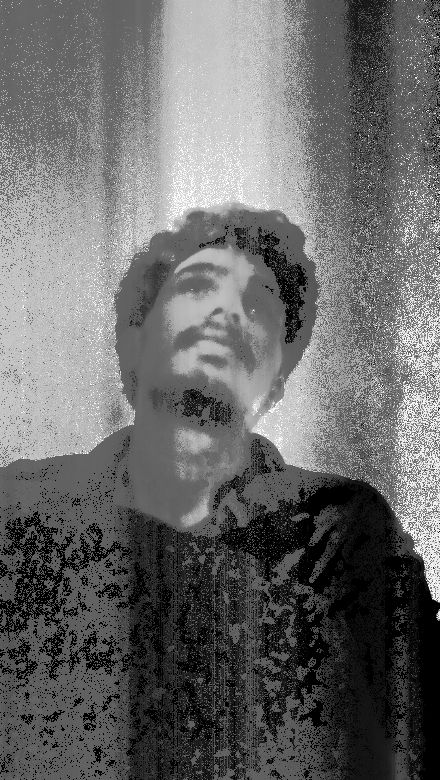

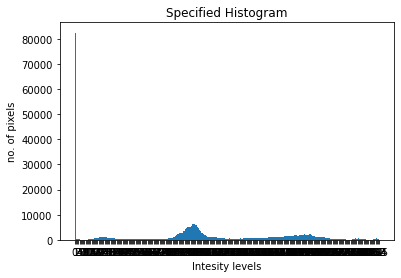

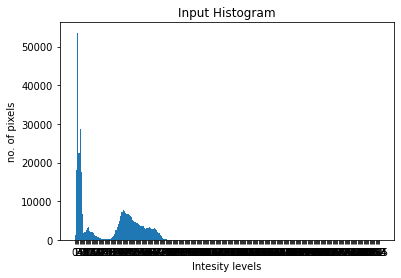

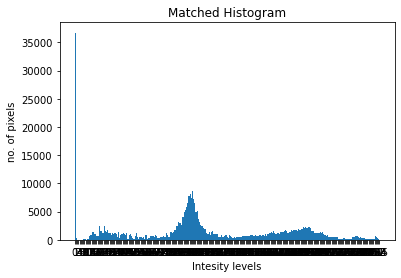

In [28]:
#** Question 13 **
#Reference or specified histogram
img = cv.resize(img,(440,780))
#Matched Histogram
matched = match_histograms(night_img,img,multichannel=True)
cv2_imshow(matched)
 

#Histogram Showing
fig,ax1 = plt.subplots(1,1)    #Defining only one figure 1 row and column
fig2,ax2 = plt.subplots(1,1)
fig3,ax3 = plt.subplots(1,1)
r = np.arange(256)            #x-axis in 1d array showing the different intensity levels.

#Convertin the intesities into  a 1d array so that used for making Histogram Data
intensity_array_ref=img.reshape(440*780)      #Reference Array
intensity_array_inp=night_img.reshape(440*780)#Input Array
intensity_array_mat=matched.reshape(440*780)  #Matched Array

#Histogram plotting
ax1.hist(intensity_array_ref,bins = r)   #Defining Histogram With its X and Y-axis Data
ax2.hist(intensity_array_inp,bins = r)
ax3.hist(intensity_array_mat,bins = r) 

#Putting visual information of Histogram, seen by users
ax1.set_title("Specified Histogram")
ax1.set_xticks(r)
ax1.set_xlabel('Intesity levels')
ax1.set_ylabel('no. of pixels')

ax2.set_title("Input Histogram")
ax2.set_xticks(r)
ax2.set_xlabel('Intesity levels')
ax2.set_ylabel('no. of pixels')

ax3.set_title("Matched Histogram")
ax3.set_xticks(r)
ax3.set_xlabel('Intesity levels')
ax3.set_ylabel('no. of pixels')
#Showing the Histogram
plt.show()

# Reference for quesno 13 is this web site "https://www.geeksforgeeks.org/histogram-matching-with-opencv-scikit-image-and-python/"

